In [6]:
import os
import cv2
import numpy as np
import pandas as pd
import anndata as ad
from PIL import Image
from sklearn.cluster import KMeans
import scanpy as sc
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the AnnData

In [7]:
parent_folder = os.getcwd()
subfolder_name = "adata_baroque_paintings"
file_name = "adata_baroque_paintings_trial6_complementarity.h5ad"

save_path = os.path.join(parent_folder, subfolder_name, file_name)
adata_baroque_paintings_full = sc.read_h5ad(save_path)

In [8]:
adata_baroque_paintings_full

AnnData object with n_obs × n_vars = 286 × 120
    obs: 'Painting_name', 'Width', 'Height', 'Commission_Year', 'Completion_Year', 'Painter', 'sacred', 'Jesuit_Art', 'Baroque_Art', 'Laplacian_Contrast', 'Gradient_Contrast', 'Hybrid_Contrast', 'File Name', 'color_prop_1', 'color_prop_2', 'color_prop_3', 'color_prop_4', 'color_prop_5', 'color_prop_6', 'color_prop_7', 'color_prop_8', 'color_prop_9', 'color_prop_10', 'color_prop_11', 'color_prop_12', 'color_prop_13', 'color_prop_14', 'color_prop_15', 'color_prop_16', 'color_prop_17', 'color_prop_18', 'color_prop_19', 'color_prop_20', 'not_sacred', 'not_Baroque_Art', 'not_Jesuit_Art', 'color_complementarity_score'

In [9]:
adata_baroque_paintings_full.obs

,Painting_name,Width,Height,Commission_Year,Completion_Year,Painter,sacred,Jesuit_Art,Baroque_Art,Laplacian_Contrast,...,color_prop_15,color_prop_16,color_prop_17,color_prop_18,color_prop_19,color_prop_20,not_sacred,not_Baroque_Art,not_Jesuit_Art,color_complementarity_score
Painting_index,,,,,,,,,,,,,,,,,,,,,
1,David with the Head of Goliath,91.3,110.4,1595,1605,Michelangelo Merisi Caravaggio,1,0,1,0.010107,...,0.016200,0.015300,0.014675,0.014350,0.007175,0.006875,0,0,1,0.042089
2,Santa Catalina,128.0,166.0,1598,1599,Michelangelo Merisi Caravaggio,1,0,1,0.007477,...,0.007125,0.007075,0.005350,0.004650,0.003400,0.003400,0,0,1,0.083127
3,Imposición de la casulla a san Ildefonso,55.0,33.0,1600,1600,Peter Paul Rubens,1,0,1,0.015918,...,0.019925,0.019325,0.018600,0.018125,0.011225,0.004700,0,0,1,0.082595
4,La Sagrada Familia,23.0,35.0,1600,1600,Peter Paul Rubens,1,0,1,0.009649,...,0.029500,0.024050,0.013775,0.005925,0.004725,0.004000,0,0,1,0.005416
5,Vulcano y el fuego,126.0,140.0,1600,1600,Peter Paul Rubens,0,0,1,0.012177,...,0.018350,0.016900,0.015575,0.009400,0.007875,0.005100,1,0,1,0.003148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,La Berceuse,0.0,0.0,1888,1888,Vincent van Gogh,0,0,0,0.050316,...,0.028325,0.027550,0.027175,0.026075,0.024800,0.013250,1,1,1,0.119284
283,Self_protrait_VanGogh,0.0,0.0,1889,1889,Vincent van Gogh,0,0,0,0.053616,...,0.023825,0.023425,0.016750,0.015975,0.015425,0.013925,1,1,1,0.372845
284,Selfportrait_with_grey_felt_hat,0.0,0.0,1887,1888,Vincent van Gogh,0,0,0,0.053712,...,0.031175,0.029200,0.028050,0.025850,0.020450,0.009925,1,1,1,0.552021


# Splitting the Data into Target and Parameters

In [10]:
baroque_mask = adata_baroque_paintings_full.obs["Baroque_Art"] == 1
adata_baroque_paintings = adata_baroque_paintings_full[baroque_mask].copy()
adata_baroque_paintings

AnnData object with n_obs × n_vars = 207 × 120
    obs: 'Painting_name', 'Width', 'Height', 'Commission_Year', 'Completion_Year', 'Painter', 'sacred', 'Jesuit_Art', 'Baroque_Art', 'Laplacian_Contrast', 'Gradient_Contrast', 'Hybrid_Contrast', 'File Name', 'color_prop_1', 'color_prop_2', 'color_prop_3', 'color_prop_4', 'color_prop_5', 'color_prop_6', 'color_prop_7', 'color_prop_8', 'color_prop_9', 'color_prop_10', 'color_prop_11', 'color_prop_12', 'color_prop_13', 'color_prop_14', 'color_prop_15', 'color_prop_16', 'color_prop_17', 'color_prop_18', 'color_prop_19', 'color_prop_20', 'not_sacred', 'not_Baroque_Art', 'not_Jesuit_Art', 'color_complementarity_score'

In [11]:
adata_baroque_paintings.var_names

Index(['color_1_R', 'color_1_G', 'color_1_B', 'color_2_R', 'color_2_G',
       'color_2_B', 'color_3_R', 'color_3_G', 'color_3_B', 'color_4_R',
       ...
       'color_17_V', 'color_18_H', 'color_18_S', 'color_18_V', 'color_19_H',
       'color_19_S', 'color_19_V', 'color_20_H', 'color_20_S', 'color_20_V'],
      dtype='object', length=120)

In [12]:
rgb_cols = [
    "color_1_R", "color_1_G", "color_1_B",
    "color_2_R", "color_2_G", "color_2_B",
    "color_3_R", "color_3_G", "color_3_B",
    "color_4_R", "color_4_G", "color_4_B",
    "color_5_R", "color_5_G", "color_5_B"
]
rgb_values = adata_baroque_paintings[:, rgb_cols].X

df_rgb = pd.DataFrame(
    rgb_values,
    columns=rgb_cols,
    index=adata_baroque_paintings.obs.index
)

In [1]:
X = pd.concat([adata_baroque_paintings.obs[["color_prop_1", "color_prop_2", "color_prop_3",  "color_prop_4",  "color_prop_5","Laplacian_Contrast","Gradient_Contrast","color_complementarity_score"]], df_rgb],axis=1)
Y_sacred = adata_baroque_paintings.obs[["sacred"]].astype(int)
Y_jesuit = adata_baroque_paintings.obs["Jesuit_Art"]

NameError: name 'pd' is not defined

In [ ]:
Y_sacred

In [ ]:
# Split Data
X_train, X_test, Y_train_sacred, Y_test_sacred = train_test_split(X, Y_sacred, test_size = 0.2, random_state = 1234)

print(f'Number of Sacred Paintings in target: {sum(Y_sacred["sacred"])}')
print(f'Number of Non-Sacred Paintings in target: {len(Y_sacred["sacred"]) - sum(Y_sacred["sacred"])}')

# 1 is sacred and 0 is non-sacred

## Rescaling Data

In [2]:
X

NameError: name 'X' is not defined

In [21]:
scaler = StandardScaler().set_output(transform="pandas")

X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.fit_transform(X_test)

In [22]:
len(X_train_rescaled)

165

In [23]:
len(X_test_rescaled)

42

## Training the Logistic Regression Model for Sacred versus Non-Sacred Art (Only Color Proportion 1 and 2)

In [24]:
logistic_regression_contrast = sklearn.linear_model.LogisticRegression(penalty='l2',
                                                       dual=False, 
                                                       tol=0.0001,
                                                       C=1.0,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       class_weight=None,
                                                       random_state=1234,
                                                       solver='lbfgs',
                                                       max_iter=100,
                                                       multi_class='deprecated',
                                                       verbose=0,
                                                       warm_start=False,
                                                       n_jobs=None,
                                                       l1_ratio=None)
logistic_regression_contrast.fit(X_train_rescaled, Y_train_sacred)
Y_predicted_sacred = logistic_regression_contrast.predict(X_train_rescaled) 

ValueError: y should be a 1d array, got an array of shape (165, 2) instead.

In [ ]:
logistic_regression_contrast

In [25]:
logistic_regression_contrast.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [26]:
logistic_regression_contrast.intercept_

AttributeError: 'LogisticRegression' object has no attribute 'intercept_'

## Confusion Matrix

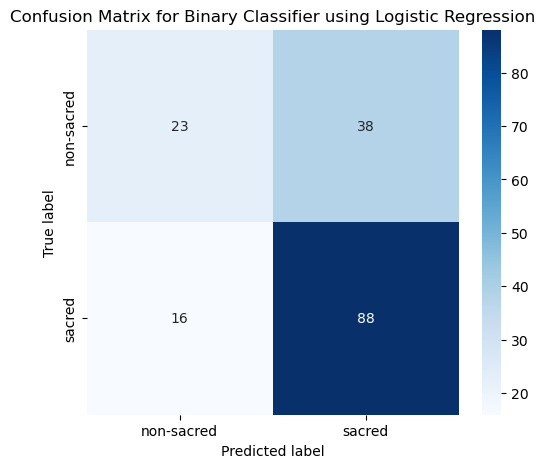

In [18]:
confusion_matrix_binary = confusion_matrix(Y_train_sacred, Y_predicted_sacred)
plt.figure(figsize=(6, 5))

sns.heatmap(confusion_matrix_binary, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=('non-sacred', 'sacred'), 
            yticklabels=('non-sacred', 'sacred'))

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Binary Classifier using Logistic Regression')
plt.show()

In [19]:
accuracy_1 = accuracy_score(Y_train_sacred, Y_predicted_sacred)
print(f'Logistic Regression Model Accuracy: {accuracy_1:.4f}')

Logistic Regression Model Accuracy: 0.6727


In [20]:
# Take the model that always tells me that the painting is sacred: the worst model. 
worst_model_accuracy = (6+98)/(6+98+9+52)
print(f'Worst Logistic Regression Model Accuracy (Training Data: {worst_model_accuracy:.4f}')

Worst Logistic Regression Model Accuracy: 0.6303


In [29]:
worst_model_accuracy = (5+19)/(5+19+8+10)
print(f'Worst Logistic Regression Model Accuracy (Training Data: {worst_model_accuracy:.4f}')

Worst Logistic Regression Model Accuracy (Training Data: 0.5714


In [21]:
#Use cosine similarity to compute degree of complimentarity among colors
# Use the 20 colors to cluster each of the pixels into one of the "buckets", and then derive proportions from this. 

# Multiple Classifiers

In [24]:
def evaluate(model, model_name, X_train, Y_train, X_test, Y_test, data_name):
  print(f'EVALUATION FOR {data_name} DATA:')

  # Model dictionary
  models = {
        'knn': sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform',
                                                                       algorithm='auto',
                                                                       leaf_size=30,
                                                                       p=2,
                                                                       metric='minkowski',
                                                                       metric_params=None,
                                                                       n_jobs=None),
        'naive_bayes': sklearn.naive_bayes.GaussianNB(priors=None, var_smoothing=1e-09),
        'logistic_regression': sklearn.linear_model.LogisticRegression(penalty='l2',
                                                                         dual=False,
                                                                         tol=0.0001,
                                                                         C=1.0,
                                                                         fit_intercept=True,
                                                                         intercept_scaling=1,
                                                                         class_weight=None,
                                                                         random_state=None,
                                                                         solver='lbfgs',
                                                                         max_iter=100,
                                                                         multi_class='deprecated',
                                                                         verbose=0,
                                                                         warm_start=False,
                                                                         n_jobs=None,
                                                                         l1_ratio=None),
        'svm': sklearn.svm.SVC(C=1.0,
                                         kernel='rbf',
                                         degree=3,
                                         gamma='scale',
                                         coef0=0.0,
                                         shrinking=True,
                                         probability=True,
                                         tol=0.001,
                                         cache_size=200,
                                         class_weight=None,
                                         verbose=False,
                                         max_iter=-1,
                                         decision_function_shape='ovr',
                                         break_ties=False,
                                         random_state=None),
        'decision_tree': sklearn.tree.DecisionTreeClassifier(criterion='gini',
                                                               splitter='best',
                                                               max_depth=None,
                                                               min_samples_split=2,
                                                               min_samples_leaf=1,
                                                               min_weight_fraction_leaf=0.0,
                                                               max_features=None,
                                                               random_state=1234,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               class_weight=None,
                                                               ccp_alpha=0.0,
                                                               monotonic_cst=None),
        'random_forest': sklearn.ensemble.RandomForestClassifier(n_estimators=100,
                                                                   criterion='gini',
                                                                   max_depth=None,
                                                                   min_samples_split=2,
                                                                   min_samples_leaf=1,
                                                                   min_weight_fraction_leaf=0.0,
                                                                   max_features='sqrt',
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   bootstrap=True,
                                                                   oob_score=False,
                                                                   n_jobs=None,
                                                                   random_state=1234,
                                                                   verbose=0,
                                                                   warm_start=False,
                                                                   class_weight=None,
                                                                   ccp_alpha=0.0,
                                                                   max_samples=None,
                                                                   monotonic_cst=None)
    }

  # Check if model name is valid
  if model not in models:
      print(f"Invalid model name: '{model}'")
      print("Choose one of:", list(models.keys()))
      return

  # Select the model
  chosen_model = models[model]

  #Fit the model
  chosen_model.fit(X_train, Y_train)

  # Predict class labels and probabilities
  Y_prediction_1 = chosen_model.predict(X_train)
  Y_probability_1 = chosen_model.predict_proba(X_train)[:, 1]

  Y_prediction_2 = chosen_model.predict(X_test)
  Y_probability_2 = chosen_model.predict_proba(X_test)[:, 1]

  print("For the training data\n\n")

  # Confusion matrix 1
  cm_1 = confusion_matrix(Y_train, Y_prediction_1)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=['non-sacred', 'sacred'])
  disp.plot()

  # Compute accuracy
  # CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
  accuracy_1 = accuracy_score(Y_train, Y_prediction_1)
  print(f'{model_name} Accuracy: {accuracy_1:.4f}')

  # Compute ROC AUC
  # CITTION: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
  roc_auc_1 = roc_auc_score(Y_train, Y_probability_1)
  print(f'{model_name} ROC-AUC: {roc_auc_1:.4f}')

  # Compute ROC curve
  # CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  fpr, tpr, thresholds = roc_curve(Y_train, Y_probability_1)

  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_1:.4f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name} {data_name} Data')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()

  #Computer Sensitivity
  sensitivity_1 = recall_score(Y_train, Y_prediction_1, pos_label=0)
  print(f'{model_name} Sensitivity: {sensitivity_1:.4f}')

  print('-----------------------------------------\n\n')

  print("For the testing data\n\n")

  # Confusion matrix 2
  cm_2 = confusion_matrix(Y_test, Y_prediction_2)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=['non-sacred', 'sacred'])
  disp.plot()

  # Compute accuracy
  accuracy_2 = accuracy_score(Y_test, Y_prediction_2)
  print(f'{model_name} Accuracy: {accuracy_2:.4f}')

  # Compute ROC AUC
  roc_auc_2 = roc_auc_score(Y_test, Y_probability_2)
  print(f'{model_name} ROC-AUC: {roc_auc_2:.4f}')

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(Y_test, Y_probability_2)

  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_2:.4f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name} {data_name} Data')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()

  #Computer Sensitivity
  sensitivity_2 = recall_score(Y_test, Y_prediction_2, pos_label=0)
  print(f'{model_name} Sensitivity: {sensitivity_2:.4f}')

## 1 Nearest Neighbords

EVALUATION FOR Baroque Paintings - Sacred vs Non-Sacred DATA:
For the training data


KNeighbors Classifier Accuracy: 0.7515
KNeighbors Classifier ROC-AUC: 0.7959


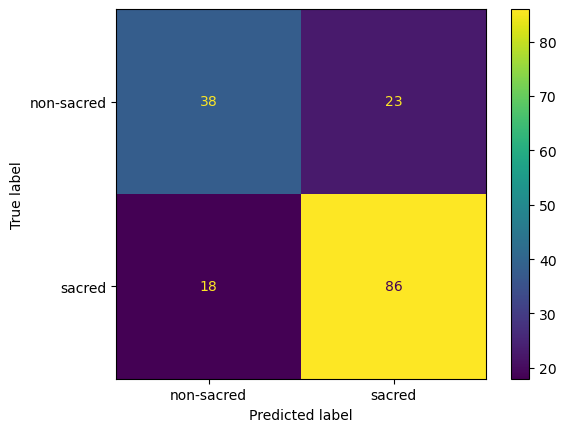

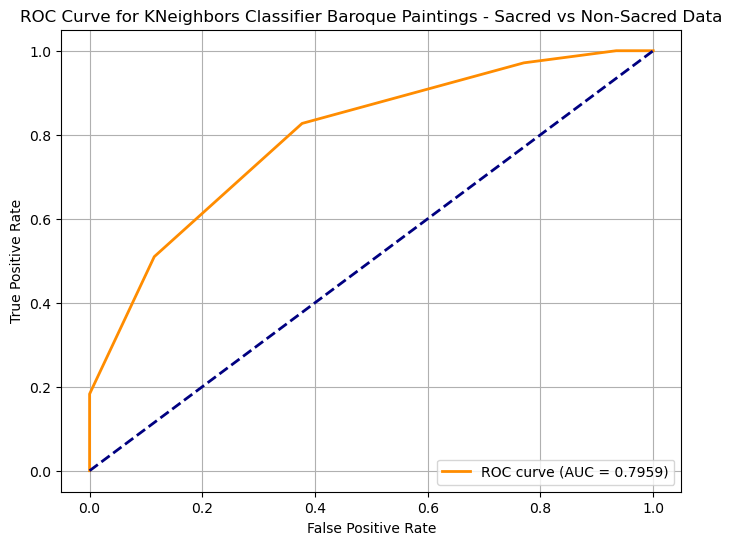

KNeighbors Classifier Sensitivity: 0.6230
-----------------------------------------


For the testing data


KNeighbors Classifier Accuracy: 0.6429
KNeighbors Classifier ROC-AUC: 0.7130


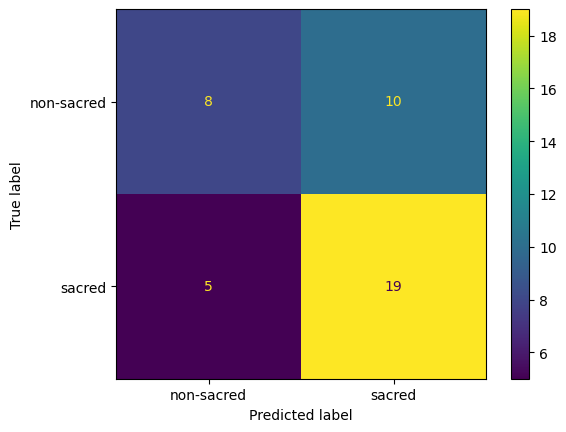

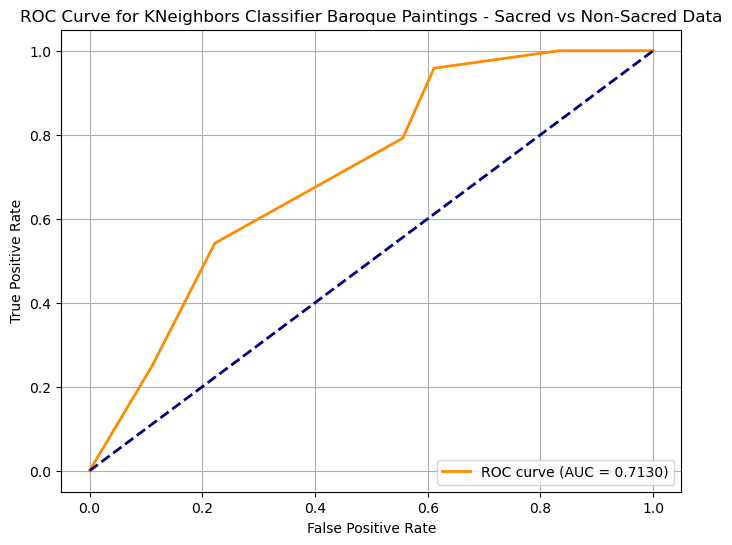

KNeighbors Classifier Sensitivity: 0.4444


In [25]:
evaluate(model = "knn",
         model_name = "KNeighbors Classifier",
         X_train = X_train_rescaled,
         Y_train = Y_train_sacred,
         X_test = X_test_rescaled,
         Y_test = Y_test_sacred,
         data_name = "Baroque Paintings - Sacred vs Non-Sacred")

## 2 Naïve Bayes

EVALUATION FOR Baroque Paintings - Sacred vs Non-Sacred DATA:
For the training data


Naïve Bayes Classifier Accuracy: 0.6667
Naïve Bayes Classifier ROC-AUC: 0.6771


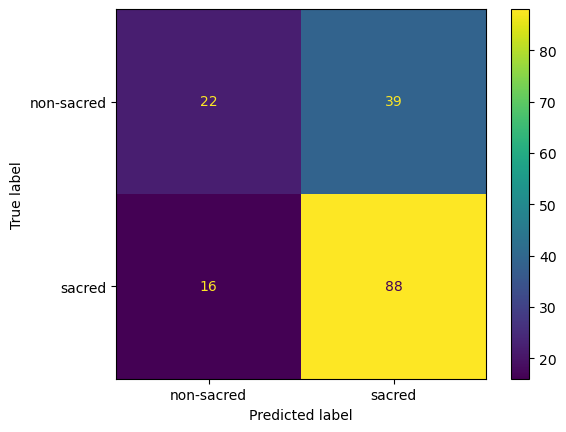

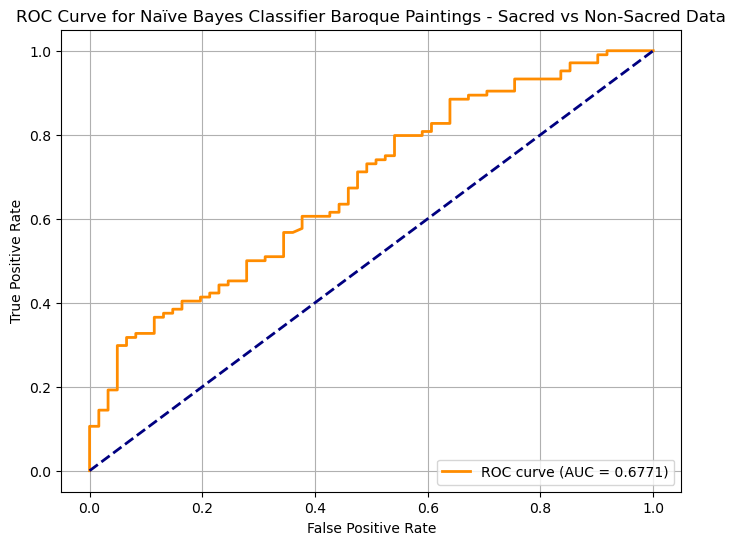

Naïve Bayes Classifier Sensitivity: 0.3607
-----------------------------------------


For the testing data


Naïve Bayes Classifier Accuracy: 0.5714
Naïve Bayes Classifier ROC-AUC: 0.6227


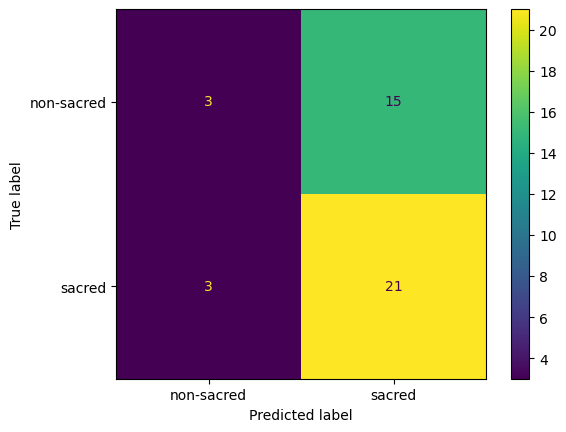

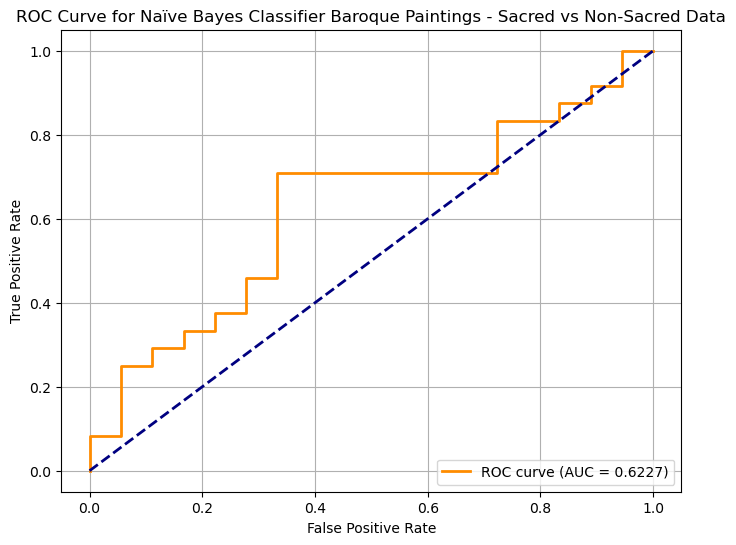

Naïve Bayes Classifier Sensitivity: 0.1667


In [26]:
evaluate(model = "naive_bayes",
         model_name = "Naïve Bayes Classifier",
         X_train = X_train,
         Y_train = Y_train_sacred,
         X_test = X_test,
         Y_test = Y_test_sacred,
         data_name = "Baroque Paintings - Sacred vs Non-Sacred")

## 3 Logistic Regression

EVALUATION FOR Baroque Paintings - Sacred vs Non-Sacred DATA:
For the training data


Logistic Regression Classifier Accuracy: 0.6727
Logistic Regression Classifier ROC-AUC: 0.7231


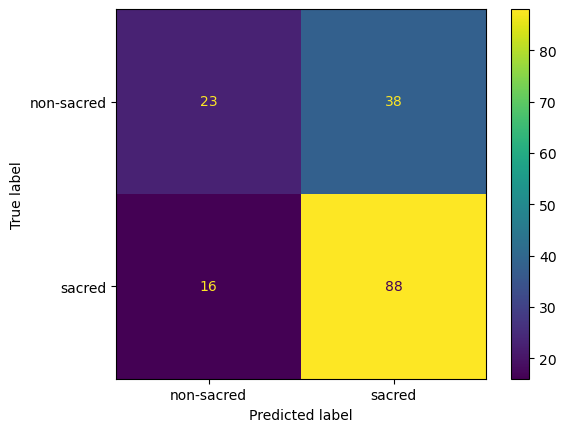

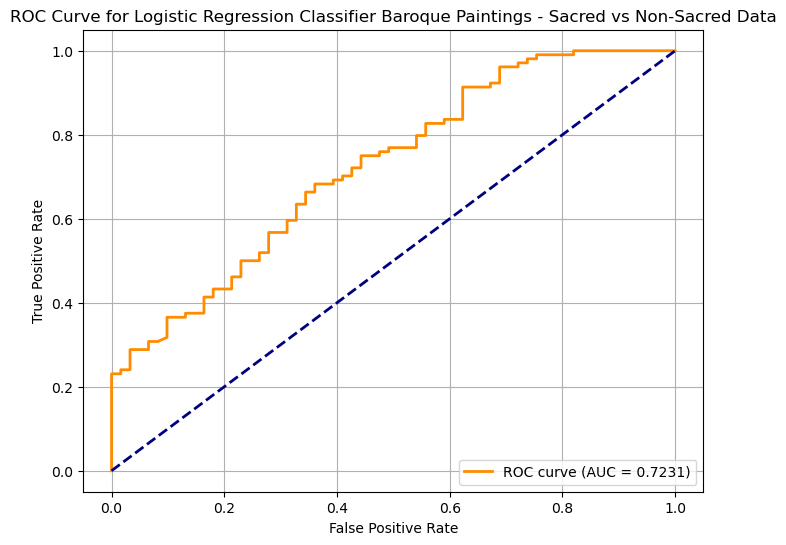

Logistic Regression Classifier Sensitivity: 0.3770
-----------------------------------------


For the testing data


Logistic Regression Classifier Accuracy: 0.6190
Logistic Regression Classifier ROC-AUC: 0.7407


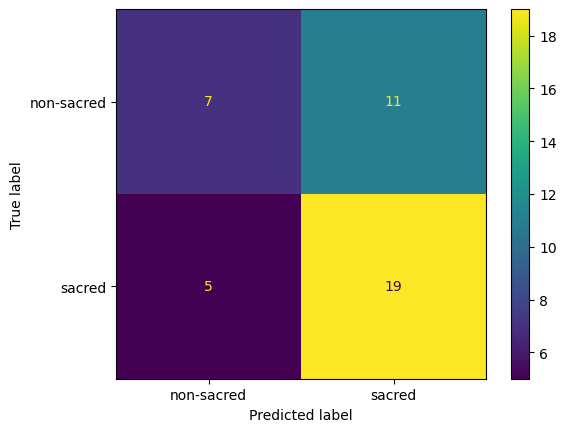

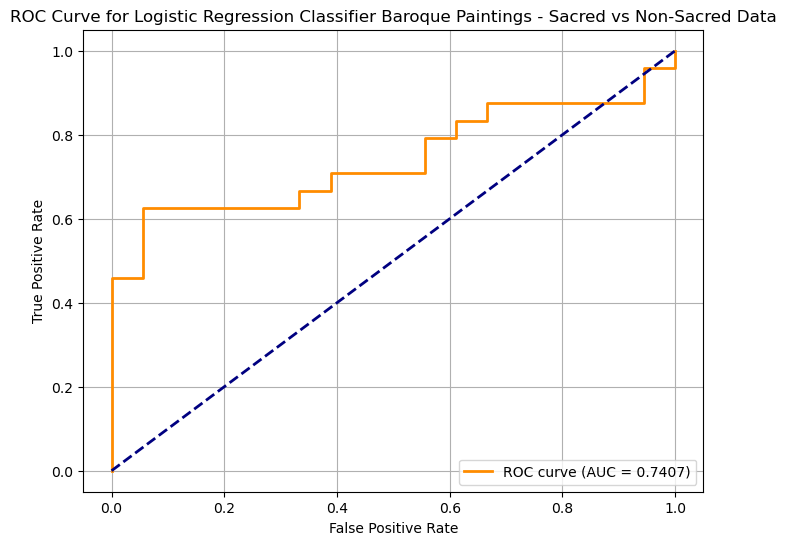

Logistic Regression Classifier Sensitivity: 0.3889


In [27]:
evaluate(model = "logistic_regression",
         model_name = "Logistic Regression Classifier",
         X_train = X_train_rescaled,
         Y_train = Y_train_sacred,
         X_test = X_test_rescaled,
         Y_test = Y_test_sacred,
         data_name = "Baroque Paintings - Sacred vs Non-Sacred")

## 4 Support Vector Machines

EVALUATION FOR Baroque Paintings - Sacred vs Non-Sacred DATA:
For the training data


Support Vector Machine Accuracy: 0.7758
Support Vector Machine ROC-AUC: 0.8979


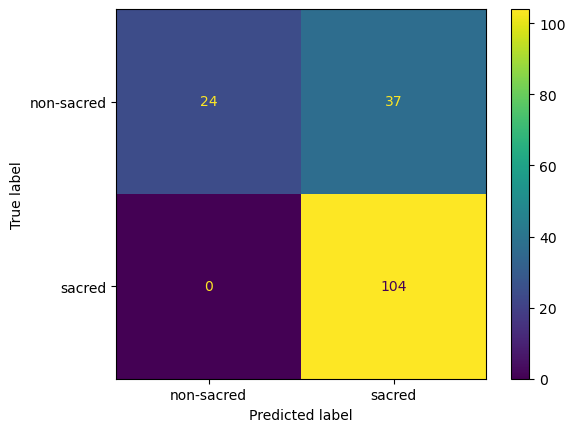

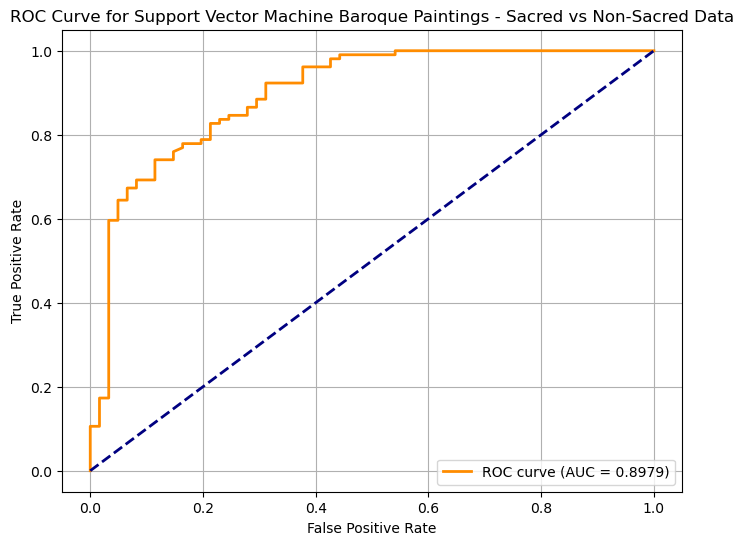

Support Vector Machine Sensitivity: 0.3934
-----------------------------------------


For the testing data


Support Vector Machine Accuracy: 0.5952
Support Vector Machine ROC-AUC: 0.6921


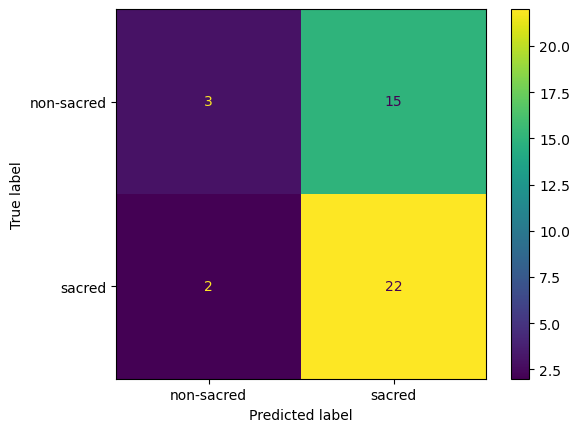

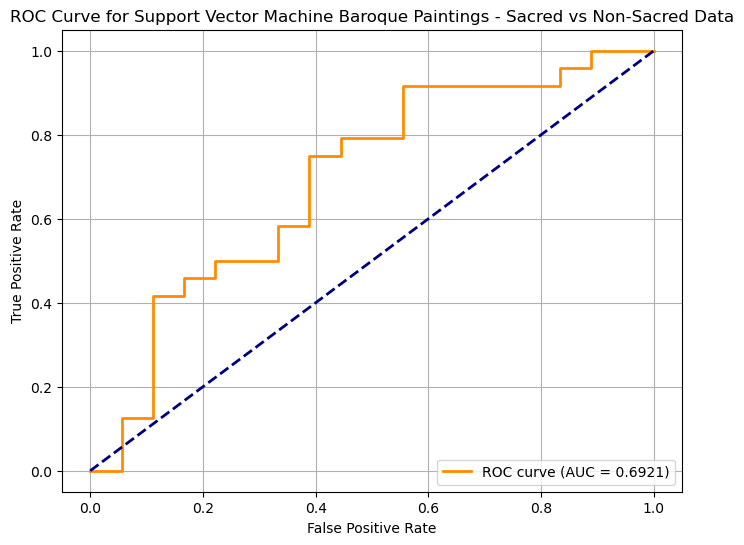

Support Vector Machine Sensitivity: 0.1667


In [28]:
evaluate(model = "svm",
         model_name = "Support Vector Machine",
         X_train = X_train_rescaled,
         Y_train = Y_train_sacred,
         X_test = X_test_rescaled,
         Y_test = Y_test_sacred,
         data_name = "Baroque Paintings - Sacred vs Non-Sacred")

## 5 Decision Tree

EVALUATION FOR Baroque Paintings - Sacred vs Non-Sacred DATA:
For the training data


Decision Tree Classifier Accuracy: 0.9939
Decision Tree Classifier ROC-AUC: 0.9999


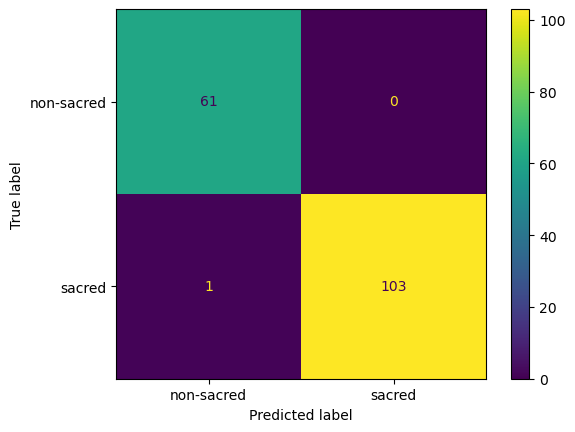

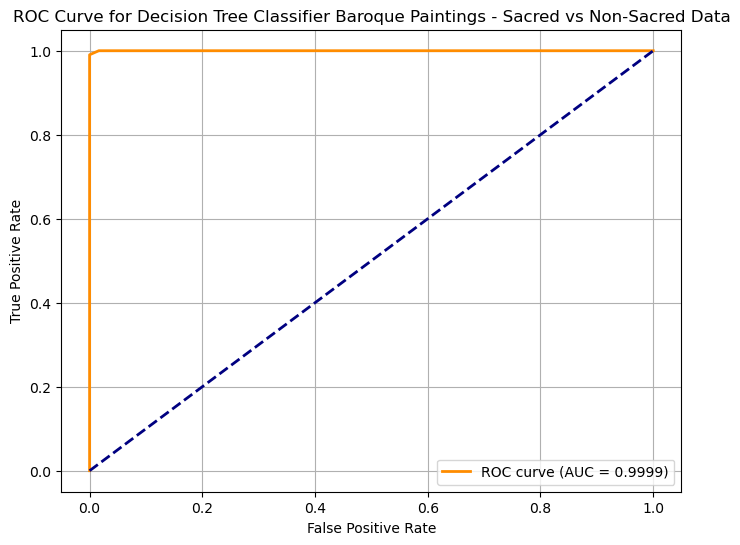

Decision Tree Classifier Sensitivity: 1.0000
-----------------------------------------


For the testing data


Decision Tree Classifier Accuracy: 0.5714
Decision Tree Classifier ROC-AUC: 0.5347


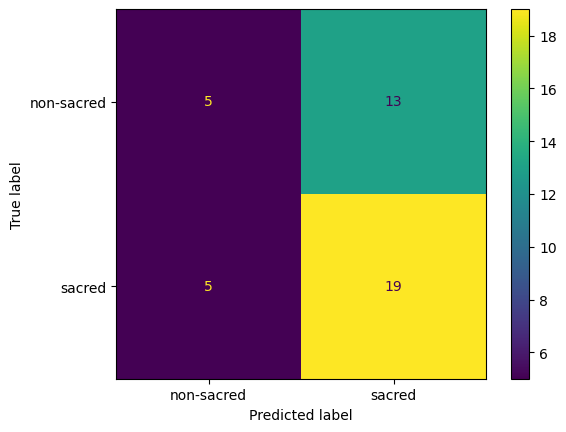

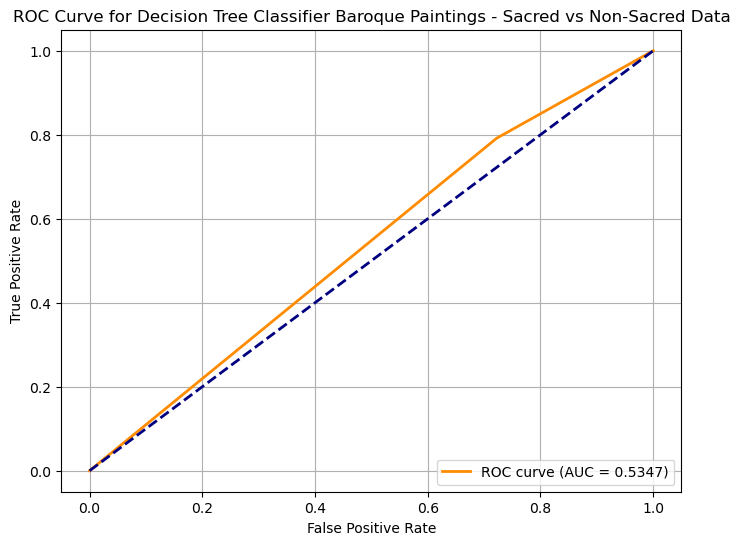

Decision Tree Classifier Sensitivity: 0.2778


In [30]:
evaluate(model = "decision_tree",
         model_name = "Decision Tree Classifier",
         X_train = X_train,
         Y_train = Y_train_sacred,
         X_test = X_test,
         Y_test = Y_test_sacred,
         data_name = "Baroque Paintings - Sacred vs Non-Sacred")

## 6 Random Forest

EVALUATION FOR Baroque Paintings - Sacred vs Non-Sacred DATA:
For the training data


Random Forest Classifier Accuracy: 0.9939
Random Forest Classifier ROC-AUC: 0.9999


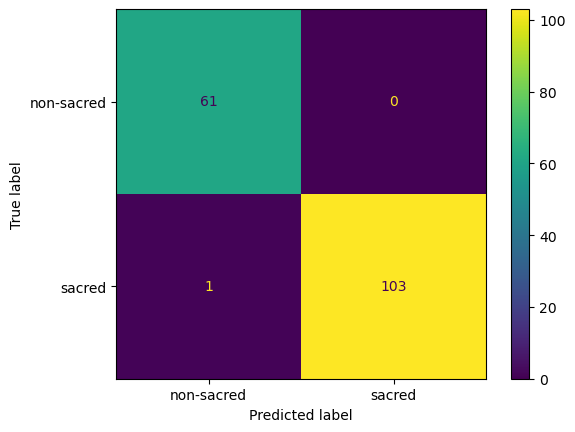

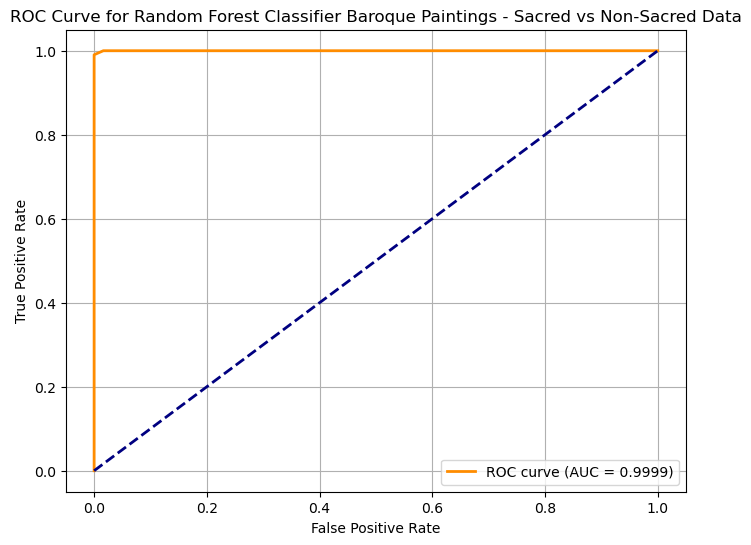

Random Forest Classifier Sensitivity: 1.0000
-----------------------------------------


For the testing data


Random Forest Classifier Accuracy: 0.7381
Random Forest Classifier ROC-AUC: 0.7384


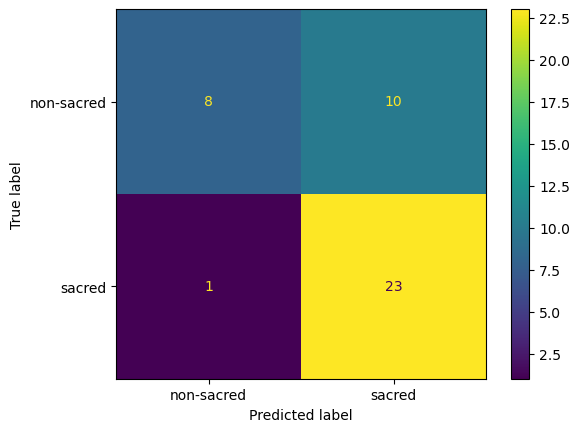

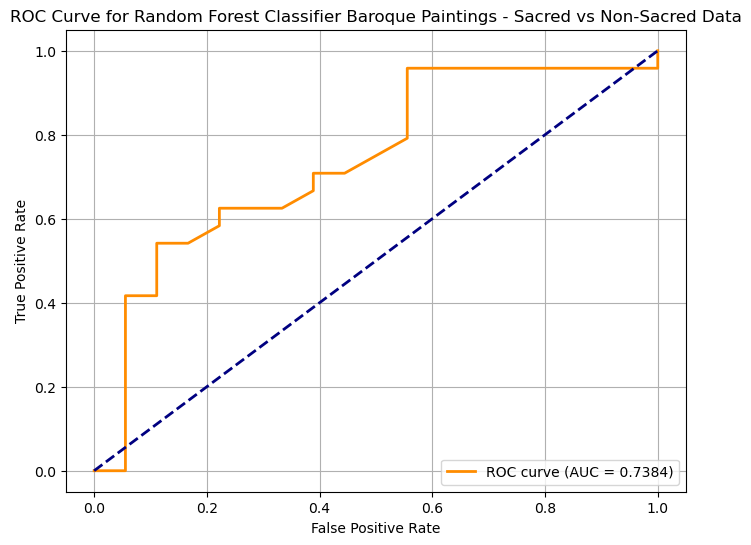

Random Forest Classifier Sensitivity: 0.4444


In [31]:
evaluate(model = "random_forest",
         model_name = "Random Forest Classifier",
         X_train = X_train,
         Y_train = Y_train_sacred,
         X_test = X_test,
         Y_test = Y_test_sacred,
         data_name = "Baroque Paintings - Sacred vs Non-Sacred")

In [ ]:
#It seems that Random Forest Classifier is the best at classifying the paintings.